# Classifying handwritten digits with MNIST using a CNN

MNIST is a dataset of handwritten digits. It often acts as Hello World for Deep learning! We will continue developing, now using a CNN.

- The steps will be (roughly same as the previous notebook, and in ML-part of course)):
    - Load the data
    - Prepare the data
    - Build the model
    - Train the model
    - Evaluate the model
    - Save the model

In [1]:
# Import libraries
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense

2023-08-25 10:16:15.524935: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/andreas/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load the MNIST dataset

(x_train, y_train) , (x_test, y_test) = mnist.load_data()

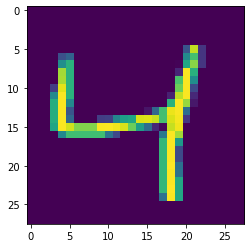

In [8]:
# Vi printar första bilden, vi kan se att det mest är svarta pixlar (nollor),
# men en del som har färg. 
import matplotlib.pyplot as plt
plt.imshow(x_train[2])

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
# Kika på datasetet, se hur många labels av varje sort
# Datasetet är rätt jämnt mellan alla siffror

unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


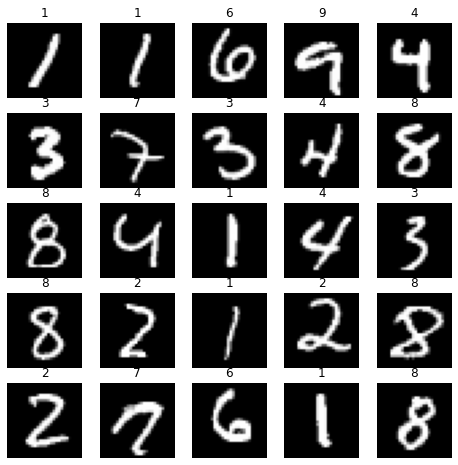

<Figure size 432x288 with 0 Axes>

In [10]:
# Plot some digits
# Looks good! 

import matplotlib.pyplot as plt

indexes = np.random.randint(0, x_train.shape[0],size=25)
images = x_train[indexes]
labels = y_train[indexes]

plt.figure(figsize=(8,8), facecolor='w')
for i in range(len(indexes)):
    plt.subplot(5,5,i+1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title(labels[i])

plt.show()
plt.savefig('mnist-samples.png')


In [11]:
# Inspekterar labels, inser att vi måste one-hot-encodea dem
labels

array([1, 1, 6, 9, 4, 3, 7, 3, 4, 8, 8, 4, 1, 4, 3, 8, 2, 1, 2, 8, 2, 7,
       6, 1, 8], dtype=uint8)

In [12]:
print(y_train.shape)
print(y_train[0])

(60000,)
5


In [15]:
# One-hot encoding
# Transformerar labels från [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] 
# till [0, 0, 0, 0, 0, 0, 0, 0, 0, 1] etc.

from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [16]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [17]:
x_train.shape

(60000, 28, 28)

In [20]:
x_test.shape

(10000, 784)

In [21]:
# Transform image to tensor

image_size = x_train.shape[1]
input_size = image_size * image_size # 28 * 28 = 784

# Resizing and normalize

x_train = x_train.reshape((60000,28,28,1))
x_train = x_train.astype(np.float32) / 255
x_test = x_test.reshape((10000,28,28,1))
x_test = x_test.astype(np.float32) / 255

In [22]:
x_train.shape

(60000, 28, 28, 1)

In [23]:
from keras.layers import Conv2D, Flatten, MaxPooling2D
# Create our model
# We use the CNN to find the features (edges) of the image
# We use the Dense to classify the features

model = Sequential()

# CNN

model.add(Conv2D(32, (3,3) , activation= "relu", input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3) , activation= "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# The output here is a 3D tensor (height, width, features), we need to flatten it to 1D

model.add(Flatten())

# Now we use the Dense to classify the features

model.add (Dense (64, activation="relu"))
model.add (Dense (10, activation="softmax"))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [25]:
# Compile the model 

model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])

In [26]:
# Train our model

history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
938/938 [==============================] - 32s 33ms/step - loss: 0.9808 - accuracy: 0.6759 - val_loss: 0.3911 - val_accuracy: 0.8829
Epoch 2/10
938/938 [==============================] - 31s 33ms/step - loss: 0.3262 - accuracy: 0.9010 - val_loss: 0.2704 - val_accuracy: 0.9197
Epoch 3/10
938/938 [==============================] - 34s 36ms/step - loss: 0.2338 - accuracy: 0.9293 - val_loss: 0.1786 - val_accuracy: 0.9474
Epoch 4/10
938/938 [==============================] - 33s 35ms/step - loss: 0.1755 - accuracy: 0.9479 - val_loss: 0.1470 - val_accuracy: 0.9565
Epoch 5/10
938/938 [==============================] - 32s 34ms/step - loss: 0.1399 - accuracy: 0.9576 - val_loss: 0.1064 - val_accuracy: 0.9667
Epoch 6/10
938/938 [==============================] - 33s 35ms/step - loss: 0.1165 - accuracy: 0.9647 - val_loss: 0.1078 - val_accuracy: 0.9679
Epoch 7/10
938/938 [==============================] - 32s 34ms/step - loss: 0.1031 - accuracy: 0.9685 - val_loss: 0.0917 - val_accuracy:

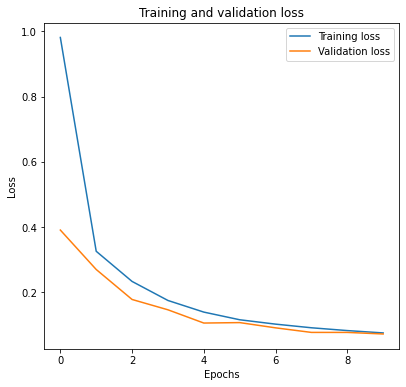

In [27]:
# The model is seriously overfitting the training data.
plt.figure(figsize=(14,6), facecolor='w')

# Plot the training loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
